In [1]:
# from pytesis.intervals import *
# from pytesis.power import *
# from pytesis.utils import kde_grid
# from pytesis.datasets import (
#     arc,
#     eyeglasses,
#     filled_circle,
#     add_noise,
#     add_outliers,
#     football_sensor,
#     rectangle
# )
# from pytesis.datasets import plot_dataset
# from pytesis.fermat import fermat_dist
# from sklearn.metrics import pairwise_distances
# from functools import partial
# import numpy as np
# import pandas as pd

# from functools import partial

# import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

from pytesis.datasets import (
    arc,
    eyeglasses,
    filled_circle,
    add_noise,
    add_outliers,
    football_sensor,
    rectangle
)
from pytesis.results import run_all_intervals, run_all
from pytesis.utils import compose

from functools import partial

# Circulo

In [3]:
n = 500
sd = 0.1
iqr_factor = 0.2
outliers_frac = 0.05
B = 30

## Base

In [4]:
circle_factory = partial(arc, n=n)
circle_results = run_all(circle_factory, h=0.3, B_power=B)
circle_results.powers

Starting computing intervals
Intervals found in cache:  False
Starting power analysis
Euclid in cache:  True
Fermat in cache:  True
KDE in cache:  True


,,# Detecciones,% Detecciones
,Agujeros,,
Euclídeo,1,30,1.0
Fermat,1,30,1.0
KDE,1,30,1.0


## Ruido

In [5]:
circle_noise_factory = compose(partial(add_noise, sd=sd), partial(arc, n=n))
# circle_noise_results = run_all(circle_noise_factory, h=0.3, B_power=B)
# circle_noise_results.powers

In [13]:
circle_noise_factory.args

(functools.partial(<function add_noise at 0x156b99630>, sd=0.1),
 functools.partial(<function arc at 0x156b993f0>, n=500))

## Outliers

In [ ]:
circle_outliers_factory = compose(
    partial(add_outliers, frac=outliers_frac, iqr_factor=iqr_factor),
    partial(arc, n=n)
)
circle_outliers_results = run_all(circle_outliers_factory, h=0.3, B_power=B)
circle_outliers_results.powers

# Circulo Gaussiano

In [ ]:
n = 500
sd = 0.1
iqr_factor = 0.2
outliers_frac = 0.05
B = 30

## Base

In [ ]:
circle_gauss_factory = partial(arc, n=n, sampling="normal"))
circle_gauss_results = run_all(circle_gauss_factory, h=0.3, B_power=B)
circle_gauss_results.powers

## Ruido

In [ ]:
circle_gauss_noise_factory = compose(partial(add_noise, sd=sd), circle_gauss_factory)
circle_gauss_noise_results = run_all(circle_gauss_noise_factory, h=0.3, B_power=B)
circle_gauss_noise_results.powers

## Outliers

In [ ]:
circle_gauss_outliers_factory = compose(
    partial(add_outliers, frac=outliers_frac, iqr_factor=iqr_factor),
    circle_gauss_factory
)
circle_gauss_outliers_results = run_all(circle_gauss_outliers_factory, h=0.3, B_power=B)
circle_gauss_outliers_results.powers

# Eyeglasses

In [17]:
n = 800
bridge_height = 0.5
sd = 0.025
h = 0.15
B = 3

## Base

Starting computing intervals
Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat
Starting power analysis
Finished euclid power analysis
Finished fermat power analysis
Finished kde power analysis


# Detecciones  % Detecciones
         Agujeros                              
Euclídeo 0                     0            0.0
         1                     0            0.0
         2                     3            1.0
Fermat   0                     0            0.0
         1                     3            1.0
         2                     0            0.0
KDE      0                     3            1.0
         1                     0            0.0
         2                     0            0.0

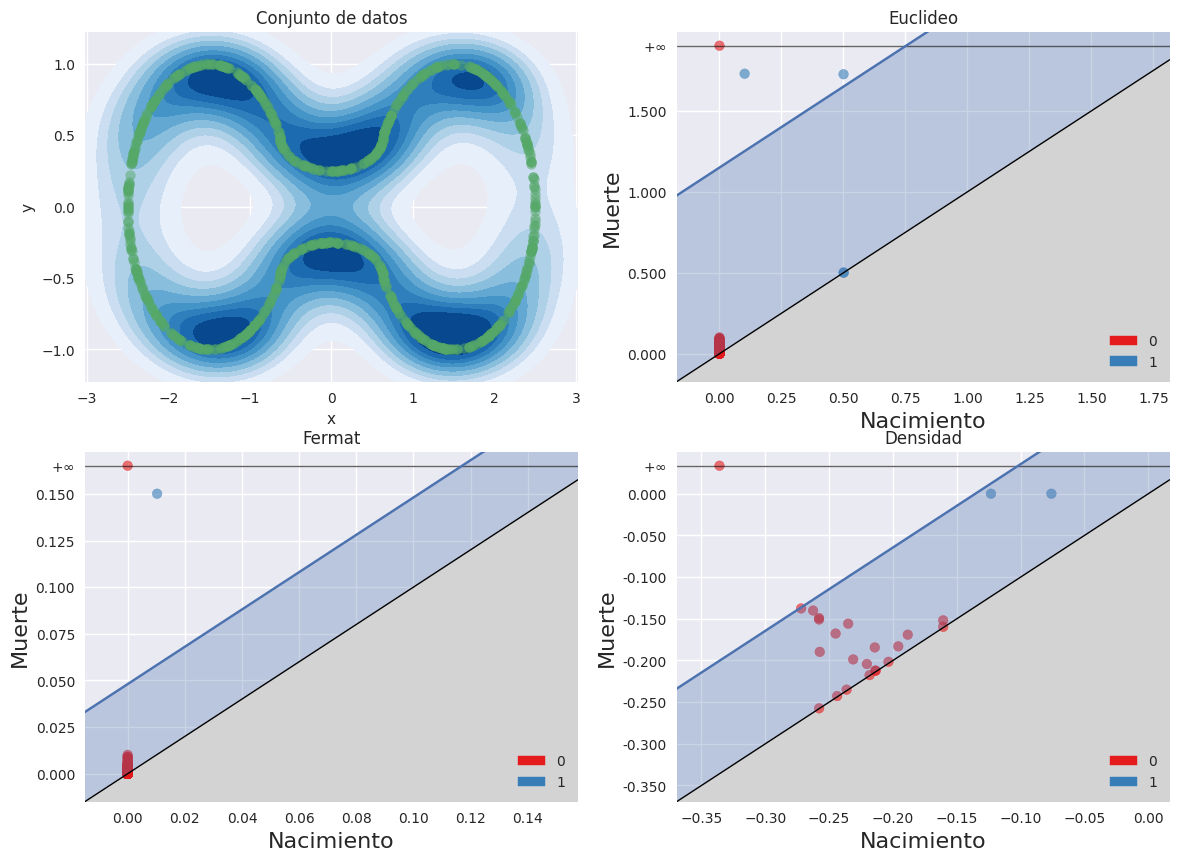

In [18]:
eyeglasses_factory = partial(eyeglasses, n=n, bridge_height=bridge_height)
eyeglasses_results = run_all(eyeglasses_factory, h=h, B_power=B)
eyeglasses_results.powers

## Ruido

In [ ]:
eyeglasses_noise_factory = compose(partial(add_noise, sd=sd), eyeglasses_factory)
eyeglasses_noise_results = run_all(eyeglasses_noise_factory, h=h, B_power=B)
eyeglasses_noise_results.powers

## Outliers

In [ ]:
eyeglasses_outliers_factory = compose(
    partial(add_outliers, frac=outliers_frac, iqr_factor=iqr_factor),
    eyeglasses_factory
)
eyeglasses_outliers_results = run_all(eyeglasses_outliers_factory, h=h, B_power=B)
eyeglasses_outliers_results.powers